In [29]:
from TSInterpret.data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN
import tensorflow as tf

# Parameters

In [30]:
dataset='ElectricDevices'

# Load Data

In [31]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='time',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [32]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Load Model

In [33]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

# Explanation Algo

In [34]:
item=test_x[10].reshape(1,-1,1)
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 51ms/step


In [35]:
print(y_target)

[[6.5272084e-06 1.0916962e-18 2.0263034e-11 1.5986618e-07 8.7627843e-03
  1.0000000e+00 1.8584505e-08]]


In [36]:
from TSInterpret.InterpretabilityModels.counterfactual.NativeGuideCF import NativeGuideCF
exp_model=NativeGuideCF(model,shape,(train_x,train_y), backend='TF', mode = 'time')

279/279 [==============================] - 0s 1ms/step


In [37]:
exp,label=exp_model.explain(item, np.argmax(y_target,axis=1),method='NUN_CF')

(1, 1, 96)
1/1 [==============================] - 0s 13ms/step


# Plot Item 

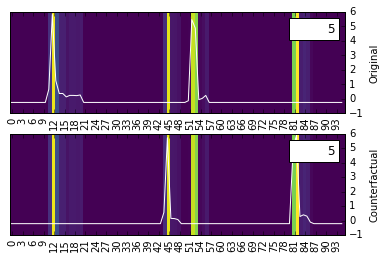

In [38]:
%matplotlib inline
exp_model.plot(item.reshape(-1),np.argmax(y_target,axis=1)[0],exp.reshape(-1),label)

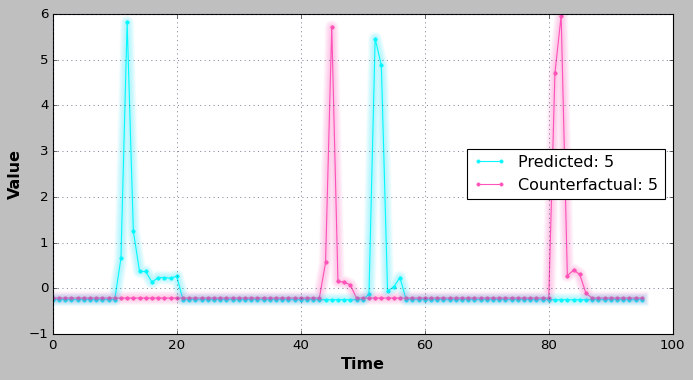

In [39]:
%matplotlib inline
exp_model.plot_in_one(item,np.argmax(y_target,axis=1)[0],exp,label)